## Exercise B.3 -- Arrhenius Curve Fitting

In this exercise we have a look at diffusion data (either from experiment or theoretical calculations) and want to obtain the activation energy $E_A$.

Many dynamical properties in chemistry (such as rate constants, diffusion, etc.) follow an [Arrhenian temperature dependency](https://en.wikipedia.org/wiki/Arrhenius_plot) given as <br />
<br />

$$ y(T) = y_0 e^{-\frac{E_A}{RT}} $$<br />

with $y_0$ being the pre-exponential factor, R and T are the molar gas constant (8.3145 J mol$^{-1}$ K $^{-1}$) and temperature, respectively.

One potential option to obtain $E_A$ is a non-linear exponential fit, but this is known to be less reliable than its linear counterpart!

Consequently, Mr. [Svante Arrhenius](https://en.wikipedia.org/wiki/Svante_Arrhenius) used a linearization of the equation, which in case of the diffusion coefficient looks like this: <br />
<br />

$$ ln(D) = ln(D_0) - \frac{E_A}{R}\frac{1}{T} $$<br />

This corresponds to a linear equation <br />
<br />

$$ y = a\cdot x + b$$

$$y = ln(D)$$

$$ x= \frac{1}{T}$$ <br />

Applying standard linear regression we obtain <br />
<br />

$$a=ln(D_0)$$
$$b = -\frac{E_A}{R}$$ <br />

From this we can directly access the activation energy $E_A$ via:$<br />
<br />
$$ E_A = - a \cdot R $$<br />

Easy! :D


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This time the files are in [csv-format](https://en.wikipedia.org/wiki/Comma-separated_values)
(= comma separated values), *i.e.*
the different data columns are
separated by comma symbols.

Luckily, we can again use the
command *np.loadtext()*, but
we have to indicate the comma
by adding *delimiter = “,”*.

Most programs such as Excel, Origin and scientific software can write data sets in this format. If you want to use python in your research, this is most likely the most common file format to input you data sets.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dataset_a = np.loadtxt('/content/drive/My Drive/python_course/Files/Arrhenius/D_vs_T_v1.csv', delimiter=",")
dataset_b = np.loadtxt('/content/drive/My Drive/python_course/Files/Arrhenius/D_vs_T_v2.csv', delimiter=",")
dataset_c = np.loadtxt('/content/drive/My Drive/python_course/Files/Arrhenius/D_vs_T_v3.csv', delimiter=",")

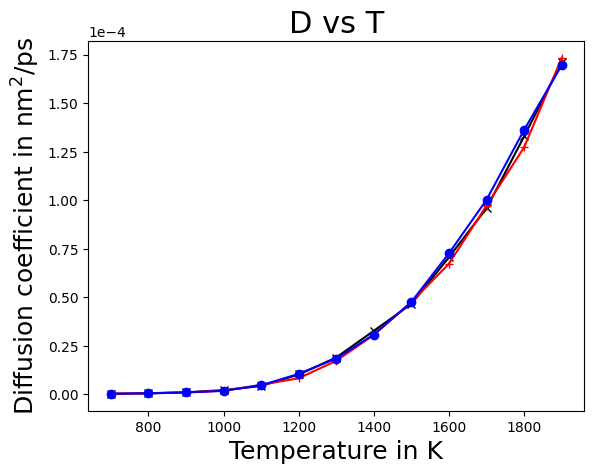

In [3]:
import matplotlib.ticker as ticker

# Setup the plot
plt.plot(dataset_a[:, 0], dataset_a[:, 1], color='k',  marker = 'x')
plt.plot(dataset_b[:, 0], dataset_b[:, 1], color='r',  marker = '+')
plt.plot(dataset_c[:, 0], dataset_c[:, 1], color='b',  marker = 'o')

# Add labels and title
plt.xlabel('Temperature in K', fontsize=18)
plt.ylabel('Diffusion coefficient in nm$^2$/ps', fontsize=18)
plt.title('D vs T', fontsize=22)

# Change y-axis to scientific format
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))


Let's prepare our data for plotting. We need the inverse temperature and the $ln(D)$.

But wait: Does log() compute log($x$) or ln($x$)?

We need a quick test:

In [4]:
# Euler's number e
euler=2.7182818284590452

print(np.log(10), np.log(euler), np.log10(10), np.log10(euler))

2.302585092994046 1.0 1.0 0.4342944819032518


In [ ]:
inv_Ta = 1.0/dataset_a[:,0]
ln_Da  = np.log(dataset_a[:,1])

inv_Tb = 1.0/dataset_b[:,0]
ln_Db  = np.log(dataset_b[:,1])

inv_Tc = 1.0/dataset_c[:,0]
ln_Dc  = np.log(dataset_c[:,1])

Now let's plot the data.

- The high temperature region is now to the left, the low temperatures are on the right side of the plot.

- It is very common to use 1000/T to obtain managable numbers. Now, the value of 1 on the x-axis corresponds to 1000K.

- Please be aware, that the value of 1000/T only applies to the plot. Our original data in the 'invT' arrays are not influenced!

Text(0.5, 1.0, 'ln(D) vs 1000/T')

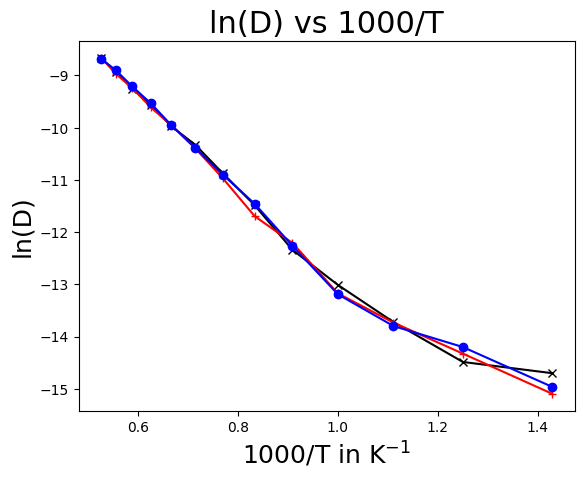

In [ ]:
# Setup the plot
plt.plot(1000 * inv_Ta, ln_Da, color='k', marker = 'x')
plt.plot(1000 * inv_Tb, ln_Db, color='r', marker = '+')
plt.plot(1000 * inv_Tc, ln_Dc, color='b', marker = 'o')

# Add labels and title
plt.xlabel('1000/T in K$^{-1}$', fontsize=18)
plt.ylabel('ln(D)', fontsize=18)
plt.title('ln(D) vs 1000/T', fontsize=22)

Oh no! In all three cases the plot is only linear above 1000K (to left of 1.0 in the plot).

When carrying out the linear regression, only the data points above 1000K should be used!

Let's test this only for data set 1 first, by plotting only the last data points.

- <u>Careful #1:</u> Python counts from zero, so our 13 datapoints are indexed from 0 to 12.

- <u>Careful #2:</u> When plotting, the last entry is not included, i.e. invT1[3:12] would exclude the data point 12 \#PythonSpecial

- So, to access the last datapoints, we have to select invT1[3:13] and ln_D[3:13]

Let’s make and overlay of the full and selected data range.

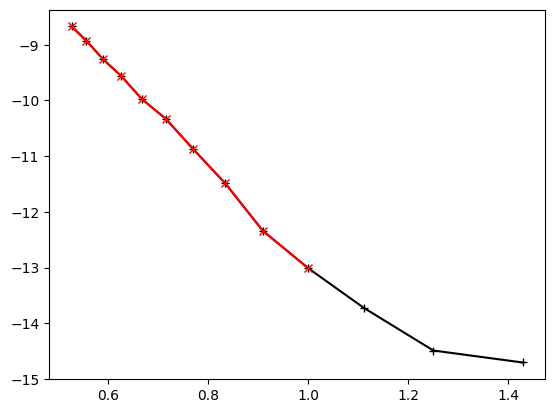

In [ ]:
plt.plot(1000 * inv_Ta, ln_Da, color='k', marker = '+')
plt.plot(1000 * inv_Ta[3:13], ln_Da[3:13], color='r', marker = 'x')

Let's fit the data to our selection and plot the regression.

We already established that using [SciPy](https://scipy.org/) is by far the simplest method.

Using the slope we can easily calculate the ativation energy of the process *via*:
<br />
$$ E_A = - a \cdot R $$<br />

$$ \text{molar gas constant:} R = 8.3145 \frac{\text{J}}{\text{mol K}} $$

Tpyically, we need the energy in units of eV (electron volts), so we have to transform the result to get the final value.

<br />
$$ 1 \frac{\text{kJ}}{\text{mol}} = 0.01036427 \text{eV} $$
<br />


Literature estimates for the activation energy are about 0.83 eV.


In [ ]:
from scipy.stats import linregress

# Let's execute the linear regression for all three datasets
# Remember, that reg_a is an array with:
#
# Slope:     reg_a[0]
# Intercept: reg_a[1]
# R:         reg_a[2] -> to get R^2 we need to calculate the square. i.e. reg_a[2]**2
reg_a = linregress(inv_Ta[3:13], ln_Da[3:13])
reg_b = linregress(inv_Tb[3:13], ln_Db[3:13])
reg_c = linregress(inv_Tc[3:13], ln_Dc[3:13])

# Let's calculate the activation energy in eV
#
act_energy_a = -reg_a[0] * 8.31415 / 1000.0 * 0.01036427
act_energy_b = -reg_b[0] * 8.31415 / 1000.0 * 0.01036427
act_energy_c = -reg_c[0] * 8.31415 / 1000.0 * 0.01036427

print(f"---------------------------------------------------------")
print(f"        Slope        Intercept       R²      act. Energy")
print(f"---------------------------------------------------------")
print(f"  A:  {reg_a[0]:8.2f}K     {reg_a[1]:8.4f}     {reg_a[2]**2:8.4f}   {act_energy_a:8.3f} eV")
print(f"  B:  {reg_b[0]:8.2f}K     {reg_b[1]:8.4f}     {reg_b[2]**2:8.4f}   {act_energy_b:8.3f} eV")
print(f"  C:  {reg_c[0]:8.2f}K     {reg_c[1]:8.4f}     {reg_c[2]**2:8.4f}   {act_energy_c:8.3f} eV")
print(f"---------------------------------------------------------")



---------------------------------------------------------
        Slope        Intercept       R²      act. Energy
---------------------------------------------------------
  A:  -9300.12K      -3.7566       0.9986      0.801 eV
  B:  -9490.08K      -3.6647       0.9987      0.818 eV
  C:  -9503.99K      -3.6152       0.9991      0.819 eV
---------------------------------------------------------


This are good results. Let's plot the different curves in form of three subplots.

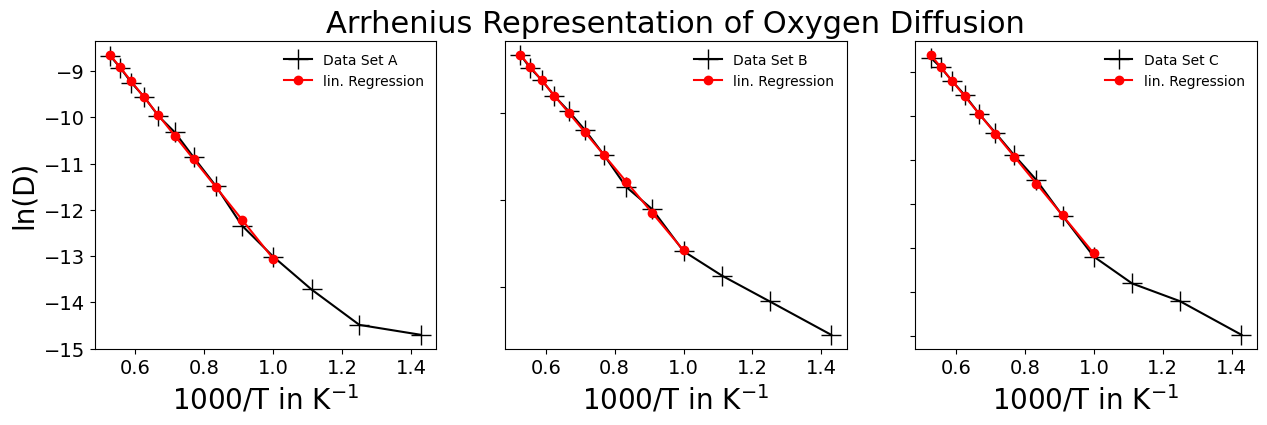

In [ ]:
# Set up the subplot -- one row, two columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

ax1.plot(1000 * inv_Ta, ln_Da, color='k', marker = '+', markersize = 15, label = 'Data Set A')
ax1.plot(1000 * inv_Ta[3:13], reg_a[0] * inv_Ta[3:13] + reg_a[1], color='r', marker = 'o', label = 'lin. Regression')

ax2.plot(1000 * inv_Tb, ln_Db, color='k', marker = '+', markersize = 15, label = 'Data Set B')
ax2.plot(1000 * inv_Tb[3:13], reg_b[0] * inv_Tb[3:13] + reg_b[1], color='r', marker = 'o', label = 'lin. Regression')

ax3.plot(1000 * inv_Tc, ln_Dc, color='k', marker = '+', markersize = 15, label = 'Data Set C')
ax3.plot(1000 * inv_Tc[3:13], reg_c[0] * inv_Tc[3:13] + reg_c[1], color='r', marker = 'o', label = 'lin. Regression')

# Remove y-tick labels for plots 1 and 2
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Increase font size of axis labels
for i in [ax1, ax2, ax3]:
  i.tick_params(axis='both', labelsize=14)
  i.set_xlabel(f'1000/T in K$^{{-1}}$', fontsize=20)
  i.legend(frameon = False)

# Add labels and title
ax2.set_title('Arrhenius Representation of Oxygen Diffusion', fontsize=22)
ax1.set_ylabel('ln(D)', fontsize=20)

plt.show()